In [23]:
# read three pkl files and combine them into one
import pickle
import pandas as pd
with open('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations_1a.pkl', 'rb') as f:
    annotations_1a = pickle.load(f)

with open('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations_1b.pkl', 'rb') as f:
    annotations_1b = pickle.load(f)

with open('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations_dr.pkl', 'rb') as f:
    annotations_dr = pickle.load(f)

# Combine the dataframes
combined_df = pd.concat([annotations_1a, annotations_1b, annotations_dr])

# Store the combined dataframe into a new pickle file
combined_df.to_pickle('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations.pkl')


In [1]:
# load df from pickle file
import pandas as pd
vtc_share_output = pd.read_pickle('/home/nele_pauline_suffo/outputs/vtc/quantex_share_vtc_output.pkl')
annotations_output = pd.read_pickle('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations.pkl')

example_annotation = annotations_output[annotations_output['audio_file_name'] == '672793']
example_prediction = vtc_share_output[vtc_share_output['audio_file_name'] == '672793']

In [2]:
# Get the list of audio files that have annotations
annotated_files = annotations_output['audio_file_name'].unique()

# Filter the hypothesis DataFrame to only include these files
predictions = vtc_share_output[vtc_share_output['audio_file_name'].isin(annotated_files)]

In [13]:
# sort the dataframes by audio file name ascending
predictions.sort_values(by='audio_file_name')

,audio_file_name,Utterance_Start,Utterance_Duration,Voice_type,Utterance_End
0,100898,0.231,4.411,SPEECH,4.642
465,100898,647.217,2.066,FEM,649.283
466,100898,649.900,0.785,KCHI,650.685
467,100898,649.905,0.769,SPEECH,650.674
468,100898,652.825,0.692,FEM,653.517
...,...,...,...,...,...
222736,940000,335.011,0.159,FEM,335.170
222737,940000,336.786,1.797,SPEECH,338.583
222738,940000,336.992,0.851,FEM,337.843
222731,940000,325.529,1.782,FEM,327.311


(0.0, 30.0)

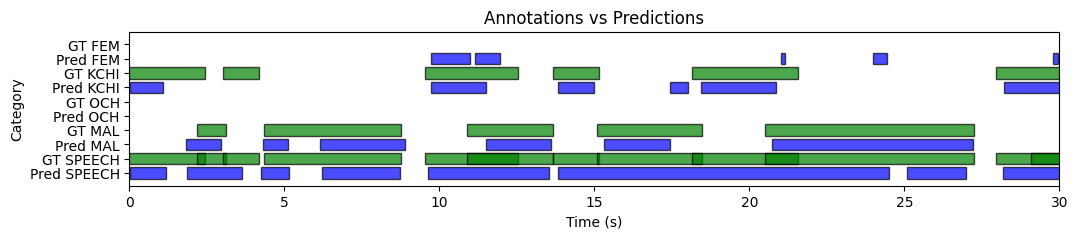

In [14]:
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(12, 2))
ax = plt.gca()

ground_truth_fem = example_annotation[example_annotation['Voice_type'] == 'FEM']
ground_truth_mal = example_annotation[example_annotation['Voice_type'] == 'MAL']
ground_truth_kchi = example_annotation[example_annotation['Voice_type'] == 'KCHI']
ground_truth_och = example_annotation[example_annotation['Voice_type'] == 'OCH']
ground_truth_speech = example_annotation[example_annotation['Voice_type'] == 'SPEECH']
predictions_fem = example_prediction[example_prediction['Voice_type'] == 'FEM']
predictions_mal = example_prediction[example_prediction['Voice_type'] == 'MAL']
predictions_kchi = example_prediction[example_prediction['Voice_type'] == 'KCHI']
predictions_och = example_prediction[example_prediction['Voice_type'] == 'OCH']
predictions_speech = example_prediction[example_prediction['Voice_type'] == 'SPEECH']

# Define y-positions for the two bars
y_ground_truth_fem = 9
y_predictions_fem = 8 

y_ground_truth_kchi = 7
y_predictions_kchi = 6 

y_ground_truth_och = 5
y_predictions_och = 4 

y_ground_truth_mal = 3
y_predictions_mal = 2

y_ground_truth_speech = 1
y_predictions_speech = 0

# Plot predictions, excluding SPEECH
for idx, row in predictions_fem.iterrows():
    ax.barh(y_predictions_fem, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)

for idx, row in predictions_mal.iterrows():
    ax.barh(y_predictions_mal, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)

for idx, row in predictions_kchi.iterrows():
    ax.barh(y_predictions_kchi, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)

for idx, row in predictions_och.iterrows():
    ax.barh(y_predictions_och, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)

for idx, row in predictions_speech.iterrows():
    ax.barh(y_predictions_speech, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)
    
for idx, row in ground_truth_fem.iterrows():
    ax.barh(y_ground_truth_fem, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)
    
for idx, row in ground_truth_mal.iterrows():
    ax.barh(y_ground_truth_mal, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)

for idx, row in ground_truth_kchi.iterrows():
    ax.barh(y_ground_truth_kchi, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)
    
for idx, row in ground_truth_och.iterrows():
    ax.barh(y_ground_truth_och, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)
    
for idx, row in ground_truth_speech.iterrows():
    ax.barh(y_ground_truth_speech, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)
    
    

# Adjust y-axis ticks and labels
ax.set_yticks([y_ground_truth_speech, y_predictions_speech, y_ground_truth_fem, y_predictions_fem, y_ground_truth_mal, y_predictions_mal, y_ground_truth_kchi, y_predictions_kchi, y_ground_truth_och, y_predictions_och])
ax.set_yticklabels(["GT SPEECH", "Pred SPEECH", "GT FEM", "Pred FEM", "GT MAL", "Pred MAL", "GT KCHI", "Pred KCHI", "GT OCH", "Pred OCH"])

# Add labels and titles
ax.set_xlabel("Time (s)")
ax.set_ylabel("Category")
ax.set_title("Annotations vs Predictions")
ax.set_xlim(0, 30)

In [35]:
from pyannote.core import Annotation, Segment
from collections import defaultdict


def dataframe_to_annotation(df, label_column="Voice_type"):
    """
    Converts a DataFrame to a pyannote.core.Annotation object.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with 'Utterance_Start', 'Utterance_End', and a label column.
    - label_column (str): Column name for the labels (default: 'Voice_type').

    Returns:
    - Annotation: pyannote.core.Annotation object.
    """
    annotation = Annotation()
    for _, row in df.iterrows():
        start = float(row["Utterance_Start"])
        end = float(row["Utterance_End"])
        label = row[label_column]
        annotation[Segment(start, end)] = label
    return annotation

In [37]:
import pandas as pd
from pyannote.metrics.detection import DetectionPrecisionRecallFMeasure, DetectionErrorRate, DetectionPrecision, DetectionRecall

# Load reference and hypothesis dataframes
reference_df = pd.read_pickle('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations.pkl')
hypothesis_df = pd.read_pickle('/home/nele_pauline_suffo/outputs/vtc/quantex_share_vtc_output.pkl')

# Get the list of audio files that have annotations
annotated_files = reference_df['audio_file_name'].unique()
predictions = hypothesis_df[hypothesis_df['audio_file_name'].isin(annotated_files)]

# Remove leading/trailing whitespaces in 'Voice_type' column
reference_df['Voice_type'] = reference_df['Voice_type'].str.strip()
predictions['Voice_type'] = predictions['Voice_type'].str.strip()

small_reference = reference_df[reference_df['audio_file_name'] == '672793']
small_predictions = predictions[predictions['audio_file_name'] == '672793']

# List of voice_type classes
voice_types = ['KCHI', 'OCHI', 'FEM', 'MAL', 'SPEECH']

# Initialize the metric
detection_metric = DetectionPrecisionRecallFMeasure(collar=0, skip_overlap=False)
detection_error_rate = DetectionErrorRate(collar=0, skip_overlap=False)
detection_precision = DetectionPrecision(collar=0, skip_overlap=False)
detection_recall = DetectionRecall(collar=0, skip_overlap=False)
# Store per-class metrics
metrics = {}

# Loop over each voice type
for voice_type in voice_types:
    # Filter dataframes for the current voice type
    reference_filtered = small_reference[small_reference['Voice_type'] == voice_type]
    hypothesis_filtered = small_predictions[small_predictions['Voice_type'] == voice_type]

    # Convert to pyannote Annotations
    reference_annotation = dataframe_to_annotation(reference_filtered)
    hypothesis_annotation = dataframe_to_annotation(hypothesis_filtered)

    # Compute the detection metrics
    f1_score = detection_metric(reference_annotation, hypothesis_annotation)
    det_error_rate = detection_error_rate(reference_annotation, hypothesis_annotation)
    precision = detection_precision(reference_annotation, hypothesis_annotation)
    recall = detection_recall(reference_annotation, hypothesis_annotation)

    # Store the results
    metrics[voice_type] = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'detecion_error_rate': det_error_rate
    }

    # Print per-class metrics
    print(f"Metrics for {voice_type}:")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall: {recall:.3f}")
    print(f"  F1 Score: {f1_score:.3f}\n")
    print(f"  Detection Error Rate: {det_error_rate:.3f}\n")
    
    # Reset the metric for the next class
    detection_metric.reset()

# Compute averaged F1 score over all classes
average_f1 = sum([m['f1_score'] for m in metrics.values()]) / len(metrics)

print(f"Averaged F1 Score over all classes: {average_f1:.3f}")

/tmp/ipykernel_3523160/1805687209.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Voice_type'] = predictions['Voice_type'].str.strip()
/home/nele_pauline_suffo/.conda/envs/pyannote/lib/python3.8/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


Metrics for KCHI:
  Precision: 0.529
  Recall: 0.697
  F1 Score: 0.601

  Detection Error Rate: 0.924

Metrics for OCHI:
  Precision: 1.000
  Recall: 1.000
  F1 Score: 1.000

  Detection Error Rate: 0.000

Metrics for FEM:
  Precision: 0.116
  Recall: 0.447
  F1 Score: 0.184

  Detection Error Rate: 3.954

Metrics for MAL:
  Precision: 0.290
  Recall: 0.667
  F1 Score: 0.404

  Detection Error Rate: 1.964

Metrics for SPEECH:
  Precision: 0.932
  Recall: 0.783
  F1 Score: 0.851

  Detection Error Rate: 0.275

Averaged F1 Score over all classes: 0.608


In [ ]:
import pandas as pd
from pyannote.metrics.detection import DetectionPrecisionRecallFMeasure, DetectionErrorRate
from pyannote.core import Annotation, Segment

def dataframe_to_annotation(df, label_column="Voice_type"):
    """
    Converts a DataFrame to a pyannote.core.Annotation object.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with 'Utterance_Start', 'Utterance_End', and a label column.
    - label_column (str): Column name for the labels (default: 'Voice_type').

    Returns:
    - Annotation: pyannote.core.Annotation object.
    """
    annotation = Annotation()
    for _, row in df.iterrows():
        start = float(row["Utterance_Start"])
        end = float(row["Utterance_End"])
        label = row[label_column]
        annotation[Segment(start, end)] = label
    return annotation

# Load reference and hypothesis DataFrames
reference_df = pd.read_pickle('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations.pkl')
hypothesis_df = pd.read_pickle('/home/nele_pauline_suffo/outputs/vtc/quantex_share_vtc_output.pkl')

# Get the list of unique audio files (videos)
all_videos = reference_df['audio_file_name'].unique()

voice_types = ['KCHI', 'OCH', 'FEM', 'MAL', 'SPEECH']  # Ensure lowercase

# Initialize lists to store metrics
overall_precisions = []
overall_recalls = []
overall_f1_scores = []
overall_error_rates = []

class_metrics = {voice_type: {'precision': [], 'recall': [], 'f1_score': [], 'error_rate': []} for voice_type in voice_types}

# Loop over each video
for video in all_videos:
    # Filter DataFrames for the current video
    reference_filtered = reference_df[reference_df['audio_file_name'] == video]
    hypothesis_filtered = hypothesis_df[hypothesis_df['audio_file_name'] == video]

    # Skip if there are no annotations for this video
    if reference_filtered.empty:
        print(f"No annotations available for video: {video}. Skipping.")
        continue

    # Convert to pyannote Annotations
    reference_annotation = dataframe_to_annotation(reference_filtered)
    hypothesis_annotation = dataframe_to_annotation(hypothesis_filtered)

    # Initialize metrics
    detection_f1 = DetectionPrecisionRecallFMeasure(collar=0, skip_overlap=False)
    detection_error_rate = DetectionErrorRate(collar=0, skip_overlap=False)

    # Compute the detection metrics
    detection_f1(reference_annotation, hypothesis_annotation)
    error_rate = detection_error_rate(reference_annotation, hypothesis_annotation)

    # Retrieve precision, recall, and F1 score
    precision, recall, f1_score = detection_metric.compute_metrics()

    # Store the results
    overall_precisions.append(precision)
    overall_recalls.append(recall)
    overall_f1_scores.append(f1_score)
    overall_error_rates.append(error_rate)

    # Now, compute metrics per class within this video
    for voice_type in voice_types:
        # Filter annotations for the current voice type
        ref_class_filtered = reference_filtered[reference_filtered['Voice_type'] == voice_type]
        hyp_class_filtered = hypothesis_filtered[hypothesis_filtered['Voice_type'] == voice_type]

        # Skip if there are no annotations for this class in reference
        # if ref_class_filtered.empty:
        #     print(f"No annotations for class '{voice_type}' in video '{video}'. Skipping.")
        #     continue

        # Convert to pyannote Annotations
        reference_class_annotation = dataframe_to_annotation(ref_class_filtered)
        hypothesis_class_annotation = dataframe_to_annotation(hyp_class_filtered)

        # Initialize class-specific metrics
        detection_f1_class = DetectionPrecisionRecallFMeasure(collar=0, skip_overlap=False)
        error_rate_metric_class = DetectionErrorRate(collar=0, skip_overlap=False)

        # Compute the detection metrics for this class
        detection_f1_class(reference_class_annotation, hypothesis_class_annotation)
        error_rate_class = error_rate_metric_class(reference_class_annotation, hypothesis_class_annotation)

        # Retrieve precision, recall, and F1 score
        precision_class, recall_class, f1_score_class = detection_f1_class.compute_metrics()

        # Store the per-class results
        class_metrics[voice_type]['precision'].append(precision_class)
        class_metrics[voice_type]['recall'].append(recall_class)
        class_metrics[voice_type]['f1_score'].append(f1_score_class)
        class_metrics[voice_type]['error_rate'].append(error_rate_class)

# Compute averaged metrics over all videos
average_precision = sum(overall_precisions) / len(overall_precisions) if overall_precisions else 0
average_recall = sum(overall_recalls) / len(overall_recalls) if overall_recalls else 0
average_f1 = sum(overall_f1_scores) / len(overall_f1_scores) if overall_f1_scores else 0
average_error_rate = sum(overall_error_rates) / len(overall_error_rates) if overall_error_rates else 0

print("Averaged Overall Metrics Over All Videos:")
print(f"  Precision: {average_precision:.3f}")
print(f"  Recall: {average_recall:.3f}")
print(f"  F1 Score: {average_f1:.3f}")
print(f"  Error Rate: {average_error_rate:.3f}")

print("\nAveraged Metrics Per Class Over All Videos:")
for voice_type in voice_types:
    precisions = class_metrics[voice_type]['precision']
    recalls = class_metrics[voice_type]['recall']
    f1_scores = class_metrics[voice_type]['f1_score']
    error_rates = class_metrics[voice_type]['error_rate']

    if precisions:
        avg_precision = sum(precisions) / len(precisions)
        avg_recall = sum(recalls) / len(recalls)
        avg_f1 = sum(f1_scores) / len(f1_scores)
        avg_error_rate = sum(error_rates) / len(error_rates)
    else:
        avg_precision = avg_recall = avg_f1 = avg_error_rate = 0

    print(f"Class '{voice_type.upper()}':")
    print(f"  Precision: {avg_precision:.3f}")
    print(f"  Recall: {avg_recall:.3f}")
    print(f"  F1 Score: {avg_f1:.3f}")
    print(f"  Error Rate: {avg_error_rate:.3f}\n")

/home/nele_pauline_suffo/.conda/envs/pyannote/lib/python3.8/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(
